## Testing the 1-D DVR

Use matplotlib inline so that plots show up in the notebook.

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg as sla

Next import the `dvr_1d` module. We import dvr_1d using a series of ipython notebook magic commands so that we can make changes to the module file and test those changes in this notebook without having to restart the notebook kernel.

In [28]:
# autoreload the lattice module so that we can make changes to it 
# without restarting the ipython notebook server
%load_ext autoreload
%autoreload 1
%aimport dvr_1d
%aimport dvr_2d
%aimport dvr_3d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First, we'll test the 1-D sinc function DVR on a simple harmonic oscillator potential.

Testing 1-D DVR with an SHO potential
The first 5 energies are:
[0.5 1.5 2.5 3.5 4.5]


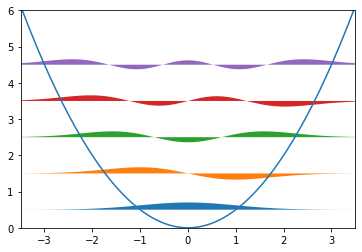

In [21]:
d = dvr_1d.SincDVR(npts=200, L=14)
d.sho_test(precision=12)

Let's try the same potential but with a Hermite basis. We see that since the Hermite polynomials are the exact solutions to the SHO problem, we can use `npts == num_eigs`. The eigenvectors will look horrible but the eigenvalues will be very accurate.

Testing 1-D DVR with an SHO potential
The first 5 energies are:
[0.5 1.5 2.5 3.5 4.5]


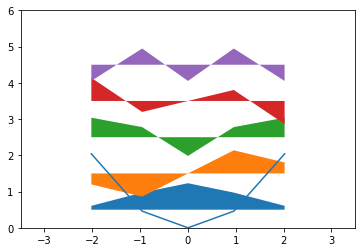

In [22]:
d = dvr_1d.HermiteDVR(npts=5)
d.sho_test(k=1., precision=11)

Next we'll test the 1-D Sinc DVR on a finite and an infinite square well. "Infinite" here just means really really huge.

Testing 1-D DVR with a finite square-well potential
The first 5 energies are:
[0.043357 0.173322 0.389563 0.691478 1.078099]


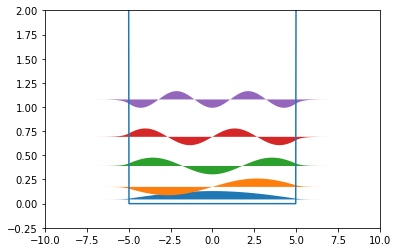

Compare to these energies:
[0.043362 0.173349 0.389619 0.691573 1.078236]
from: http://pilotscholars.up.edu/phy_facpubs/8

Testing 1-D DVR with an infinite square-well potential
The first 5 energies are:
[0.049049 0.196197 0.441444 0.784789 1.226233]


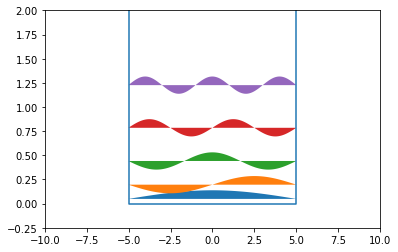

Compare to the exact energies:
[0.049348 0.197392 0.444132 0.789568 1.233701]


In [23]:
d = dvr_1d.SincDVR(npts=500, L=20)
d.square_well_test(precision=6)
d.inf_square_well_test(precision=6)

And we might as well try it out with the Hermite basis set too.

Testing 1-D DVR with a finite square-well potential
The first 5 energies are:
[0.042387 0.169452 0.380892 0.676162 1.054384]


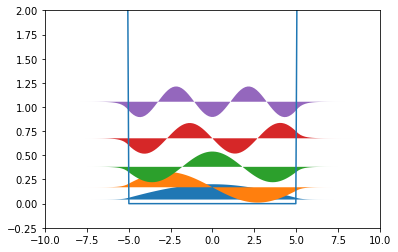

Compare to these energies:
[0.043362 0.173349 0.389619 0.691573 1.078236]
from: http://pilotscholars.up.edu/phy_facpubs/8

Testing 1-D DVR with an infinite square-well potential
The first 5 energies are:
[0.047259 0.189037 0.425334 0.75615  1.181485]


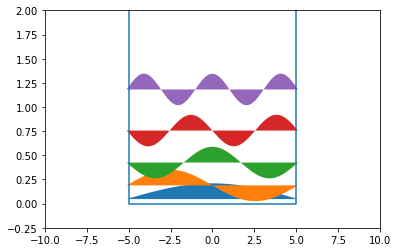

Compare to the exact energies:
[0.049348 0.197392 0.444132 0.789568 1.233701]


In [24]:
d = dvr_1d.HermiteDVR(npts=268)
d.square_well_test(precision=6)
d.inf_square_well_test(precision=6)

Let's repeat all these tests with the 1-D Fourier Sine DVR.

Testing 1-D DVR with an SHO potential
The first 5 energies are:
[0.5 1.5 2.5 3.5 4.5]


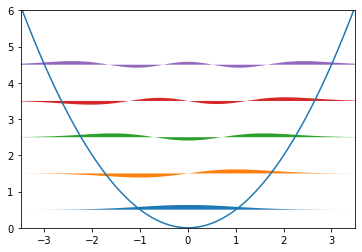

Testing 1-D DVR with a finite square-well potential
The first 5 energies are:
[0.043279 0.17301  0.388861 0.690232 1.076161]


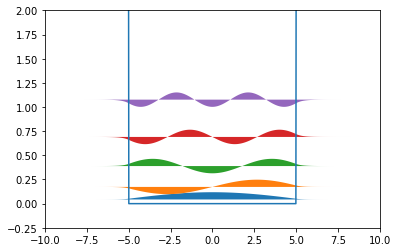

Compare to these energies:
[0.043362 0.173349 0.389619 0.691573 1.078236]
from: http://pilotscholars.up.edu/phy_facpubs/8

Testing 1-D DVR with an infinite square-well potential
The first 5 energies are:
[0.049026 0.196105 0.441236 0.784419 1.225655]


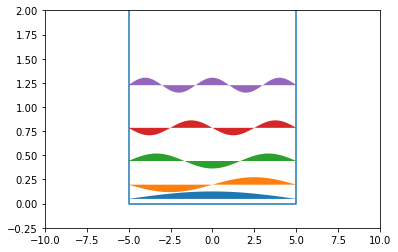

Compare to the exact energies:
[0.049348 0.197392 0.444132 0.789568 1.233701]


In [25]:
d = dvr_1d.SineDVR(npts=1000, xmin=-15, xmax=15)
d.sho_test(precision=12)
d.square_well_test(precision=6)
d.inf_square_well_test(precision=6)

Let's test the Bessel DVR

Testing 1-D DVR with an SHO potential
The first 5 energies are:
[ 2.5  4.5  6.5  8.5 10.5]


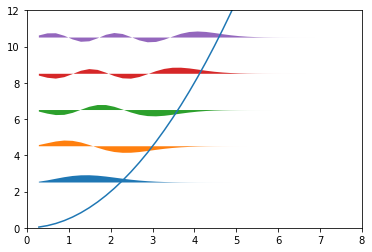

In [26]:
d = dvr_1d.BesselDVR(npts=100, R=20., dim=3, lam=1)
d.sho_test(xmin=0., xmax=8., ymin=0., ymax=12.)

Test an adiabatic marcus potential

In [32]:
d = dvr_1d.SincDVR(npts=2**7, L=14)
V = dvr_1d.VFactory().marcus_adia(dx=4.4, dG=1, w=4)
d.test_potential(V, ymax=6)

The first 5 energies are:
[0.07931357 0.82678287 1.04826822 1.62863964 2.13643167]


## Testing the 2-D DVR

We're going to be using 3D plots so let's change the matplotlib backend so the we can look at the plots in a separate window and manipulate them.

In [27]:
%matplotlib qt

Now we'll construct a 2-D Sinc DVR from a product basis of 1-D Sinc DVRs.

In [10]:
d1d = dvr_1d.SincDVR(npts = 30, L=10)
d2d = dvr_2d.DVR(dvr1d=d1d)
E, U = d2d.sho_test(num_eigs=5, precision=14)

Testing 2-D DVR with an SHO potential
The first 5 energies are:
[1.00000000004332 2.00000000111528 2.00000000111529 3.00000000218725
 3.00000002647711]


In [11]:
d1d = dvr_1d.HermiteDVR(npts=5)
d2d = dvr_2d.DVR(dvr1d=d1d)
E, U = d2d.sho_test(num_eigs=5, precision=14)

Testing 2-D DVR with an SHO potential
The first 5 energies are:
[1. 2. 2. 3. 3.]


In [12]:
d1d = dvr_1d.SincDVR(npts = 30, L=10)
d2d = dvr_2d.DVR(dvr1d=d1d)
E, U = d2d.sho_test(num_eigs=5, precision=10, uscale=3.5, doshow=True)

Testing 2-D DVR with an SHO potential
The first 5 energies are:
[1.           2.0000000011 2.0000000011 3.0000000022 3.0000000265]


In [13]:
d1d = dvr_1d.SineDVR(npts = 30, xmin=-5., xmax=5.)
d2d = dvr_2d.DVR(dvr1d=d1d)
E, U = d2d.sho_test(num_eigs=5, uscale=3., doshow=False)

Testing 2-D DVR with an SHO potential
The first 5 energies are:
[1.         2.         2.         3.00000001 3.00000008]


In [14]:
# plt.spy(d2d.t().toarray(), markersize=.1);
#plt.savefig('/Users/Adam/Dropbox/amath585_final/K_2D_sparsity.png', bbox_inches='tight', dpi=400)

NotImplementedError: Axes3D currently only supports the aspect argument 'auto'. You passed in 'equal'.

## Testing the 3-D DVR

In [18]:
d1d = dvr_1d.SincDVR(npts = 16, L=10)
d3d = dvr_3d.DVR(dvr1d=d1d, spf='csr')
E, U = d3d.sho_test(num_eigs=5)

Testing 3-D DVR with an SHO potential
The first 5 energies are:
[1.5        2.5        2.5        2.5        3.49999999]


In [21]:
#plt.spy(d3d.t().toarray(), markersize=.1);
#plt.savefig('/Users/Adam/Dropbox/amath585_final/K_3D_sparsity.png', bbox_inches='tight', dpi=400)